# Goal: Implement a custom gird search CV with kFold cross validation on KNN 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
x, y = make_classification(n_samples = 10000, n_features = 2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,stratify=y, random_state = 42)


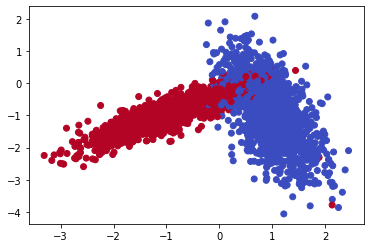

In [3]:
plt.scatter(xtest[:,0],xtest[:,1],c=ytest,cmap = 'coolwarm')
plt.show()

## Implementing custom gird search CV

In [4]:
def split_into_three_folds_indices(xtrain, n):
    set_indices = np.array_split(np.array(range(len(xtrain))),n)
    return set_indices 

In [5]:
def perform_cv_for_the_sets(xtrain, ytrain, set_indices, num1, num2, i,trainsplitscores,testsplitscores): 
    #Set01 vs Set02
    Xtrain = xtrain[set_indices[num1]]
    Ytrain = ytrain[set_indices[num1]]
    Xtest = xtrain[set_indices[num2]]
    Ytest = ytrain[set_indices[num2]]
    #Fit KNN neighbors
    classifier.n_neighbors = int(i)
    classifier.fit(Xtrain, Ytrain)
    #Predict for training set
    Ypredicted = classifier.predict(Xtrain)
    trainsplitscores.append(accuracy_score(Ytrain, Ypredicted))
    #Predict for test set
    Ypredicted = classifier.predict(Xtest)
    testsplitscores.append(accuracy_score(Ytest, Ypredicted))
    

In [ ]:
#function will split the training set into 3 groups and add the accuracy scores individually for train and test

In [6]:
def RandomSearchCV(xtrain, ytrain, classifier, params, folds):
    trainscores = []
    testscores = []
    n = 3
    for i in tqdm(params['n_neighbors']):
        trainfoldscores = []
        testfoldscores = []
        trainsplitscores = []
        testsplitscores = []
        
        for j in range(0,folds):
            set_indices = split_into_three_folds_indices(xtrain, n)
            perform_cv_for_the_sets(xtrain, ytrain, set_indices, 0, 1, i,trainsplitscores,testsplitscores)
            perform_cv_for_the_sets(xtrain, ytrain, set_indices, 0, 2, i,trainsplitscores,testsplitscores)
            perform_cv_for_the_sets(xtrain, ytrain, set_indices, 1, 2, i,trainsplitscores,testsplitscores)
            trainfoldscores.append(np.mean(np.array(trainsplitscores)))
            testfoldscores.append(np.mean(np.array(testsplitscores)))
            
        trainscores.append(np.mean(np.array(trainfoldscores)))
        testscores.append(np.mean(np.array(testfoldscores)))
                    
    return trainscores, testscores
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.71s/it]


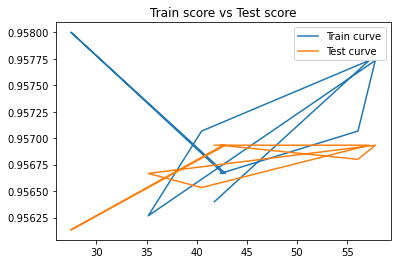

In [7]:
classifier = KNeighborsClassifier()

params = {'n_neighbors': np.random.uniform(20,60,10)}

folds = 3

trainscores, testscores = RandomSearchCV(xtrain, ytrain, classifier, params, folds)

plt.plot(params['n_neighbors'],trainscores, label = 'Train curve')
plt.plot(params['n_neighbors'],testscores, label = 'Test curve')
plt.legend()
plt.title('Train score vs Test score')
plt.show()

In [8]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

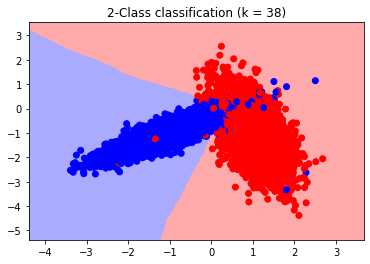

In [13]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 38)
classifier.fit(xtrain, ytrain)
plot_decision_boundary(xtrain[:, 0], xtrain[:, 1], ytrain, classifier)